# Scrapping data from Yahoo Finance
The data is scrapped from the yahoo finance website using the beautifulSoup Library then it is converted into the dataframe. The stock of the specific company is then choosed for the analysis. In this case Microsoft Copertaion (MSFT) is choosen. 

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import numpy as np

def get_stock_data(symbol, start_date, end_date):
    start_timestamp = int(datetime.strptime(start_date, "%b %d, %Y").timestamp())
    end_timestamp = int(datetime.strptime(end_date, "%b %d, %Y").timestamp())

    url = f"https://finance.yahoo.com/quote/{symbol}/history?period1={start_timestamp}&period2={end_timestamp}&interval=1d&filter=history&frequency=1d"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    
    datalist = []
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raise an HTTPError for bad responses

        soup = BeautifulSoup(response.content, "html.parser")
        table = soup.find("table", {"data-test": "historical-prices"})

        if table:
            rows = table.find("tbody").find_all("tr")
            for row in rows:
                data = [cell.text for cell in row.find_all("td")]
                datalist.append(data)  # You can customize how you want to handle and store the data

        else:
            print("No historical data found on the page.")
    except requests.exceptions.HTTPError as errh:
        print(f"HTTP Error: {errh}")
    except requests.exceptions.RequestException as err:
        print(f"Request Error: {err}")
        
    return datalist

# Example: Get historical data for AAPL (Apple Inc.) from Dec 06, 2022, to Dec 06, 2023
data = get_stock_data("MSFT", "Dec 06, 2018", "Dec 06, 2023")
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6
0,"Dec 05, 2023",366.45,373.08,365.62,372.52,372.52,"23,065,000"
1,"Dec 04, 2023",369.10,369.52,362.90,369.14,369.14,"32,063,300"
2,"Dec 01, 2023",376.76,378.16,371.31,374.51,374.51,"33,020,400"
3,"Nov 30, 2023",378.49,380.09,375.47,378.91,378.91,"30,554,400"
4,"Nov 29, 2023",383.76,384.30,377.44,378.85,378.85,"28,963,400"
...,...,...,...,...,...,...,...
95,"Jul 25, 2023",347.11,351.89,345.07,350.98,349.53,"41,637,700"
96,"Jul 24, 2023",345.85,346.92,342.31,345.11,343.68,"26,678,100"
97,"Jul 21, 2023",349.15,350.30,339.83,343.77,342.35,"69,368,900"
98,"Jul 20, 2023",353.57,357.97,345.37,346.87,345.44,"33,778,400"


# Extracting the symbols form the dataset, here we extract different symbols and data from the website

In [2]:
def extract_symbols(n_total=1000):
    counterChoice = [25, 50, 100]
    data = []
    for idx in range(0, n_total, 100):
        url = f"https://finance.yahoo.com/lookup/all?s=data&t=A&b={idx}&c=100"
        headers = {
                "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
        }
        res = requests.get(url, headers=headers)
        soup = BeautifulSoup(res.content, 'html.parser')

        lookup_table = soup.find("table", class_="lookup-table")
        if lookup_table:
            tbody = lookup_table.find("tbody")
            rows = tbody.find_all("tr")
            if rows:
                for row in rows:
                    d = []
                    cols = row.find_all("td")
                    for col in cols:
                        result = col.get_text()
                        d.append(result)
                    data.append(d)
    return data

# Extract different columns, symbols and other features for the dataset

In [3]:
data = extract_symbols()
df_symbols = pd.DataFrame(data, columns=['Symbol', 'Name', 'Last Price', 'Sector / Category', 'Type', 'Exchange'])
df_symbols

,Symbol,Name,Last Price,Sector / Category,Type,Exchange
0,DYTA,SGI Dynamic Tactical ETF,25.35,N/A,Stocks,NGM
1,DDOG,"Datadog, Inc.",114.75,Technology,Stocks,NMS
2,BLOK,Amplify Transformational Data S,26.31,N/A,ETF,PCX
3,ADP,"Automatic Data Processing, Inc.",233.21,Industrials,Stocks,NMS
4,DADA,Dada Nexus Limited,3.06,Consumer Cyclical,Stocks,NMS
...,...,...,...,...,...,...
285,^SPDIGIUP,"S&P Data Center, Tower REIT and","1,666.97",N/A,Index,SNP
286,^SPDIGIUT,"S&P Data Center, Tower REIT and","1,858.11",N/A,Index,SNP
287,0P00017LXC.SZ,Yinhua Large data Flxbl Interva,0.88,N/A,Mutual Fund,SHZ
288,^NYGBIGEURT,Nasdaq Global AI and Big Data I,"2,331.88",N/A,Index,NIM


In [4]:
df = None
for symbol in df_symbols['Symbol']:
    data = get_stock_data(symbol, "Dec 06, 2010", "Dec 06, 2023")
    if df is None:
        df = pd.DataFrame(data)
    else:
        df1 = pd.DataFrame(data)
        df = pd.concat([df, df1], axis=0)
df

No historical data found on the page.
No historical data found on the page.
No historical data found on the page.
No historical data found on the page.
No historical data found on the page.


,0,1,2,3,4,5,6
0,"Dec 05, 2023",25.81,26.08,25.81,26.06,26.06,"43,000"
1,"Dec 04, 2023",26.02,26.05,25.94,26.03,26.03,"17,100"
2,"Dec 01, 2023",25.85,26.18,25.85,26.18,26.18,"17,200"
3,"Nov 30, 2023",25.87,25.96,25.79,25.94,25.94,"21,600"
4,"Nov 29, 2023",25.99,25.99,25.83,25.88,25.88,"39,000"
...,...,...,...,...,...,...,...
95,"Jul 18, 2023",-,-,-,-,-,-
96,"Jul 17, 2023",-,-,-,-,-,-
97,"Jul 14, 2023",0.9720,0.9720,0.9720,0.9720,0.9720,-
98,"Jul 13, 2023",-,-,-,-,-,-


# EDA and Preprocessing 
check the data and look for the pattern that can be observe and preprocess the data if there is anyting that need to be done. Checking of the null value, removing or filling the null value belongs to the preprocessing. The date is alos in different format which needs to be change into the DateTime format.

In [5]:
df.shape, df.dropna().shape

((21701, 7), (21647, 7))

In [6]:
df1 = df.copy()
df1.to_csv('finance_data.csv')

In [7]:
df = pd.read_csv("finance_data.csv")
df

,Unnamed: 0,0,1,2,3,4,5,6
0,0,"Dec 05, 2023",25.81,26.08,25.81,26.06,26.06,"43,000"
1,1,"Dec 04, 2023",26.02,26.05,25.94,26.03,26.03,"17,100"
2,2,"Dec 01, 2023",25.85,26.18,25.85,26.18,26.18,"17,200"
3,3,"Nov 30, 2023",25.87,25.96,25.79,25.94,25.94,"21,600"
4,4,"Nov 29, 2023",25.99,25.99,25.83,25.88,25.88,"39,000"
...,...,...,...,...,...,...,...,...
21696,95,"Jul 18, 2023",-,-,-,-,-,-
21697,96,"Jul 17, 2023",-,-,-,-,-,-
21698,97,"Jul 14, 2023",0.9720,0.9720,0.9720,0.9720,0.9720,-
21699,98,"Jul 13, 2023",-,-,-,-,-,-


In [8]:
df.isnull().sum()

Unnamed: 0     0
0              0
1              0
2             54
3             54
4             54
5             54
6             54
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df

,Unnamed: 0,0,1,2,3,4,5,6
0,0,"Dec 05, 2023",25.81,26.08,25.81,26.06,26.06,"43,000"
1,1,"Dec 04, 2023",26.02,26.05,25.94,26.03,26.03,"17,100"
2,2,"Dec 01, 2023",25.85,26.18,25.85,26.18,26.18,"17,200"
3,3,"Nov 30, 2023",25.87,25.96,25.79,25.94,25.94,"21,600"
4,4,"Nov 29, 2023",25.99,25.99,25.83,25.88,25.88,"39,000"
...,...,...,...,...,...,...,...,...
21696,95,"Jul 18, 2023",-,-,-,-,-,-
21697,96,"Jul 17, 2023",-,-,-,-,-,-
21698,97,"Jul 14, 2023",0.9720,0.9720,0.9720,0.9720,0.9720,-
21699,98,"Jul 13, 2023",-,-,-,-,-,-


In [11]:
import pandas as pd

# Assuming df is your DataFrame

# Convert the 'Dec 05, 2023' format to '5-Dec-23'
df['Date'] = pd.to_datetime(df['0'], errors='coerce').dt.strftime('%d-%b-%y')

# Drop rows where '0' (assumed to be the date column) is NaN
df = df.dropna(subset=['0'])

# Select relevant columns and rename them
df = df[['0', '1', '2', '3', '4', '5', '6']]
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Display the modified DataFrame
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,"Dec 05, 2023",25.81,26.08,25.81,26.06,26.06,"43,000"
1,"Dec 04, 2023",26.02,26.05,25.94,26.03,26.03,"17,100"
2,"Dec 01, 2023",25.85,26.18,25.85,26.18,26.18,"17,200"
3,"Nov 30, 2023",25.87,25.96,25.79,25.94,25.94,"21,600"
4,"Nov 29, 2023",25.99,25.99,25.83,25.88,25.88,"39,000"
...,...,...,...,...,...,...,...
21696,"Jul 18, 2023",-,-,-,-,-,-
21697,"Jul 17, 2023",-,-,-,-,-,-
21698,"Jul 14, 2023",0.9720,0.9720,0.9720,0.9720,0.9720,-
21699,"Jul 13, 2023",-,-,-,-,-,-


In [12]:
df.set_index('Date', inplace=True)

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.shape

(15438, 6)

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15438,15438,15438,15438,15438,15438
unique,8259,8339,8255,8383,8618,7715
top,50.0000,0.0001,50.0000,50.0000,50.0000,-
freq,83,63,97,84,84,4828


In [16]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

In [17]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [18]:
import yfinance as yf
import pandas as pd

In [19]:
# # Get the data for the stock AAPL
# data = yf.download('AAPL','max')

# # Import the plotting library
# import matplotlib.pyplot as plt
# %matplotlib inline

# # Plot the close price of the AAPL
# data['Adj Close'].plot()
# plt.show()

In [20]:
msft = yf.Ticker('MSFT')

In [21]:
msft.basic_info

lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

In [22]:
msft.get_history_metadata()

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1702327240,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 370.3,
 'chartPreviousClose': 369.14,
 'previousClose': 374.23,
 'scale': 3,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1702285200,
   'end': 1702305000,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1702305000,
   'end': 1702328400,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1702328400,
   'end': 1702342800,
   'gmtoffset': -18000}},
 'tradingPeriods':                                           pre_start                   pre_end  \
 Date                                                                            
 2023-12-04 00:00:00-05:00 2023-12-04 04:00:00-05:00 2023-12-04 09:30:00-05:00   
 2023-12-05 00:00:00-05:00 2023-12-05 04:00:00

In [23]:
msft.history(period= 'max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063504,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063504,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063504,0.064042,0.061350,0.061889,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061888,0.062427,0.060274,0.060812,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,366.450012,373.079987,365.619995,372.519989,23065000,0.0,0.0
2023-12-06 00:00:00-05:00,373.540009,374.179993,368.029999,368.799988,21182100,0.0,0.0
2023-12-07 00:00:00-05:00,368.230011,371.450012,366.320007,370.950012,23118900,0.0,0.0


In [24]:
data = yf.download('MSFT',period= 'max')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061888,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...
2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000
2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100
2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900


In [25]:
original_data = data.copy()

In [26]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9.514000e+03
mean,52.484780,53.045206,51.915533,52.500036,46.986181,5.736826e+07
std,78.128826,78.921268,77.310094,78.156230,78.152949,3.816271e+07
min,0.088542,0.092014,0.088542,0.090278,0.055969,2.304000e+06
25%,5.517578,5.609375,5.437500,5.515625,3.419488,3.303338e+07
50%,27.190001,27.459999,26.959999,27.209999,19.086811,5.053445e+07
75%,45.332500,45.930000,44.787813,45.337501,35.735990,7.125788e+07
max,383.760010,384.299988,378.160004,382.700012,382.700012,1.031789e+09


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
type(data)

pandas.core.frame.DataFrame

In [29]:
data.index = pd.to_datetime(data.index)
data.reset = data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061888,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9509,2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000
9510,2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100
9511,2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900
9512,2023-12-08,369.200012,374.459991,368.230011,374.230011,374.230011,20144800


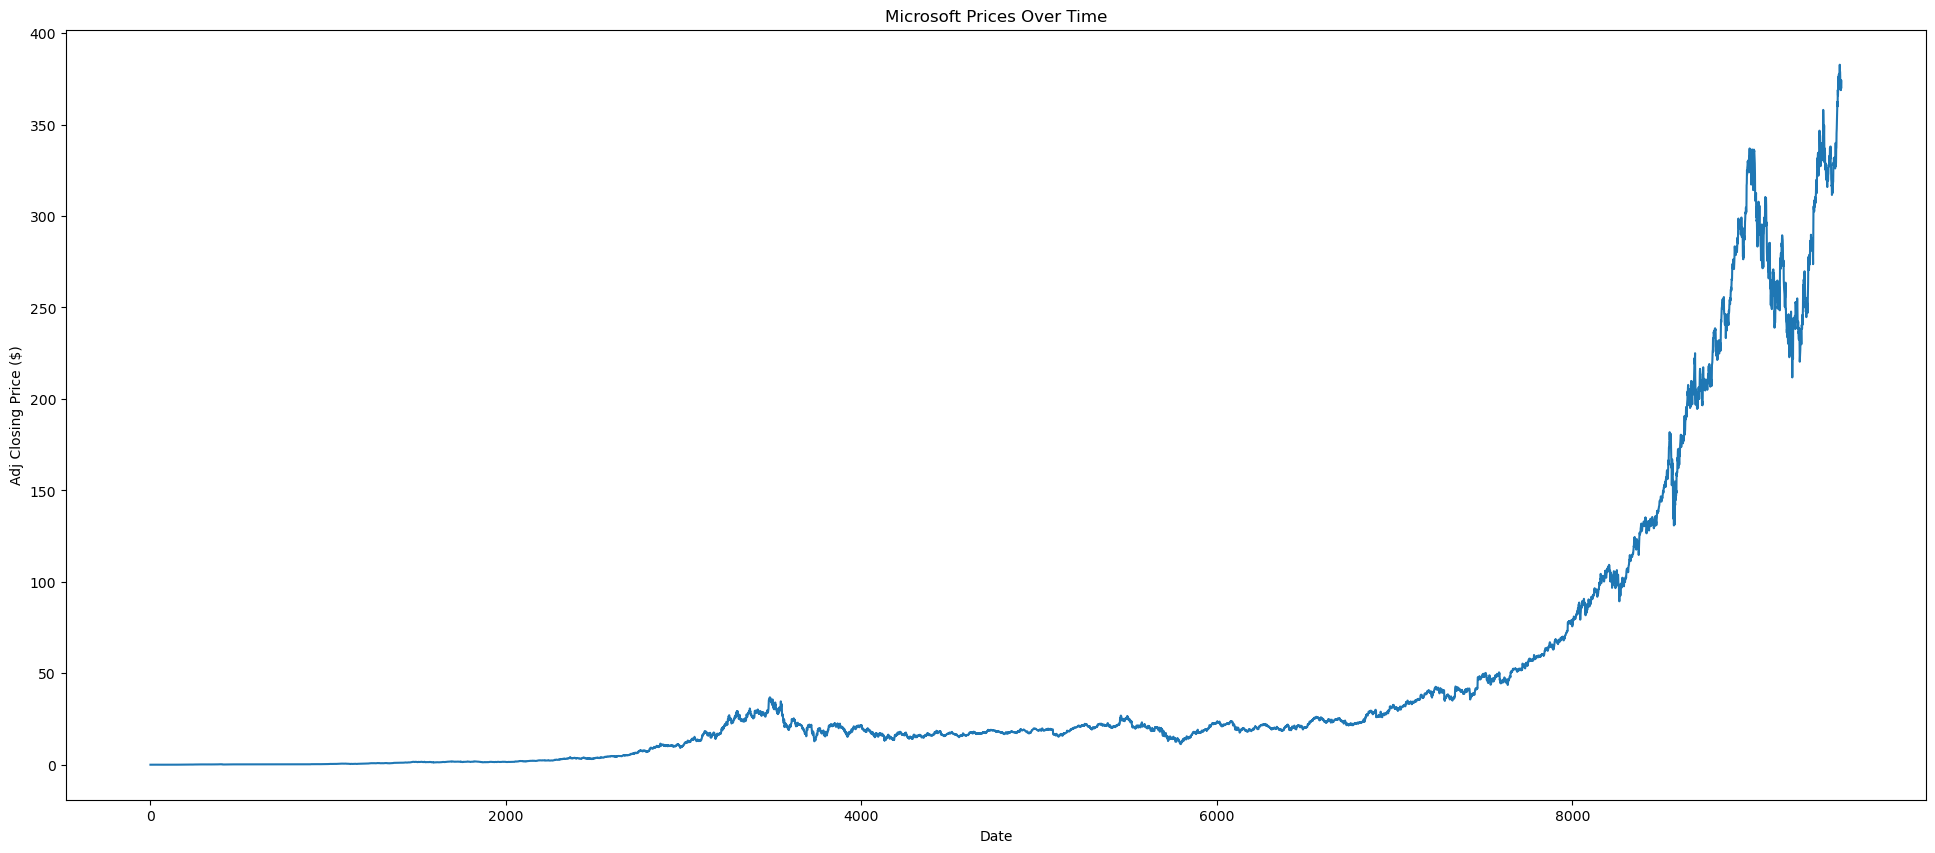

In [30]:
plt.figure(figsize= (24,10))
plt.plot(data["Adj Close"])
plt.xlabel("Date")
plt.ylabel("Adj Closing Price ($)")
plt.title("Microsoft Prices Over Time")
plt.show()

In [31]:
data['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9509   2023-12-05
9510   2023-12-06
9511   2023-12-07
9512   2023-12-08
9513   2023-12-11
Name: Date, Length: 9514, dtype: datetime64[ns]

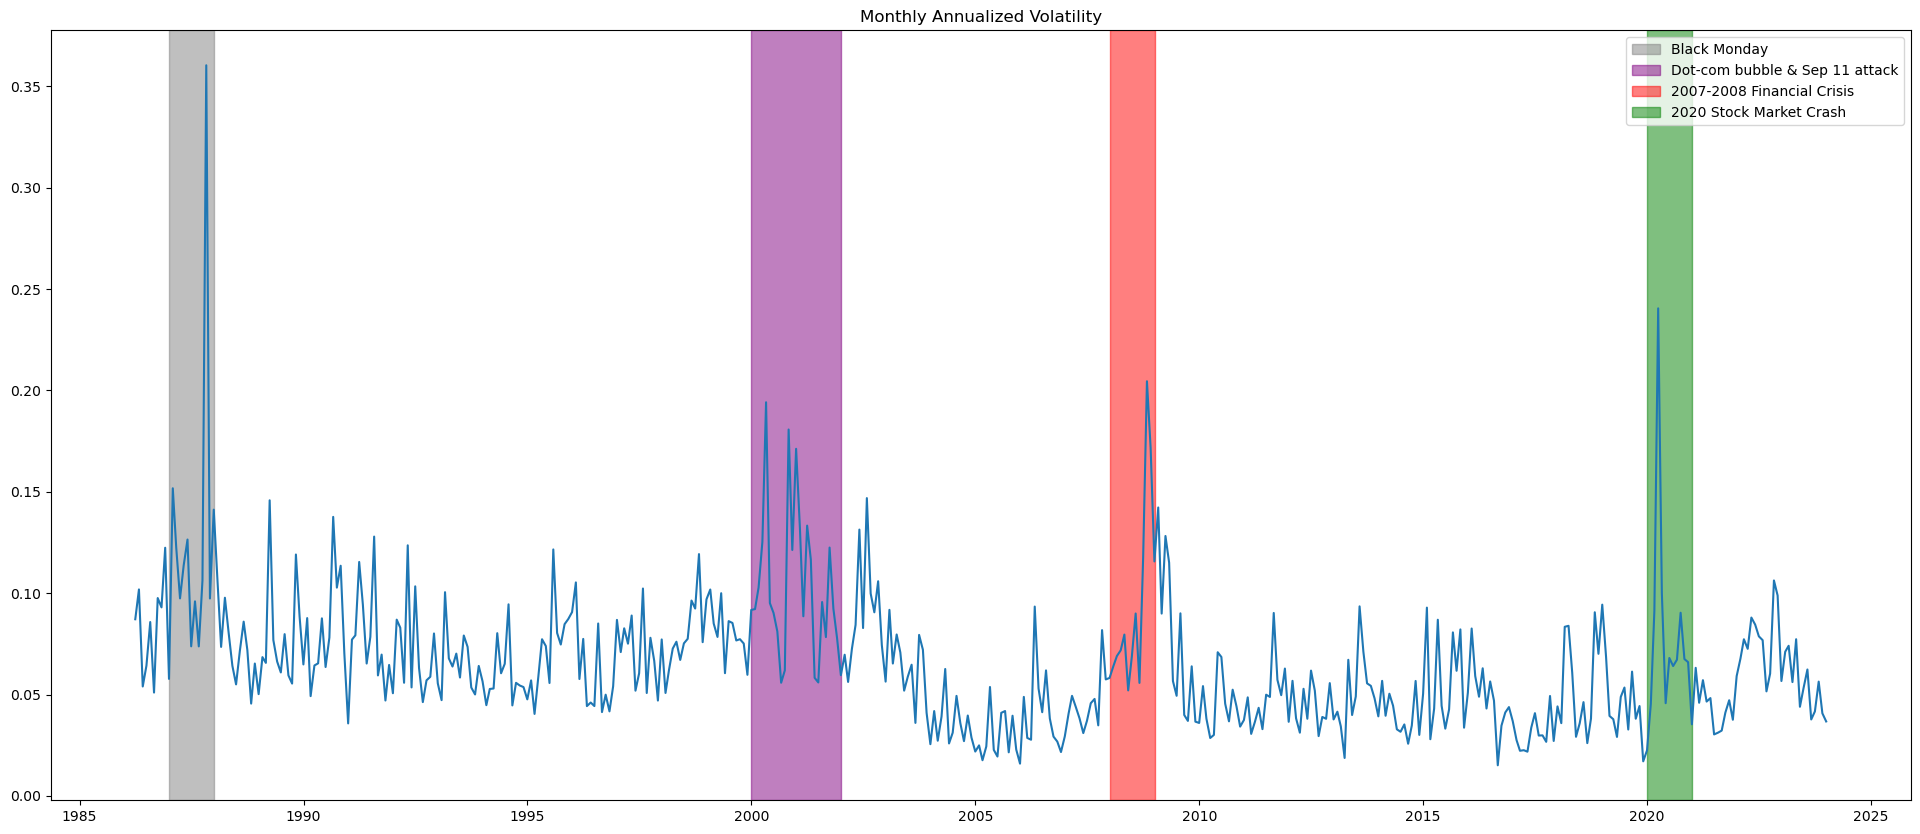

In [32]:
import numpy as np
import matplotlib.patches as mpatches


# Assuming data is your DataFrame
# Set 'Date' column as the index
microsoft_df = data.set_index('Date')

# To model returns, use daily % change
daily_data = microsoft_df['Adj Close'].pct_change()
daily_data.dropna(inplace=True)

# Resample returns per month and take STD as a measure of volatility
monthly_volatility = daily_data.resample("M").std() * np.sqrt(12)

# Visualize major market events showing up in the volatility
plt.figure(figsize=(24, 10))
plt.plot(monthly_volatility)

# Add shaded regions for major market events
event_dates = pd.to_datetime(['1987-01-01', '1988-01-01', '2000-01-01', '2002-01-01', '2008-01-01', '2009-01-01', '2020-01-01', '2021-01-01'])
plt.axvspan(event_dates[0], event_dates[1], color='grey', alpha=0.5, label="Black Monday")
plt.axvspan(event_dates[2], event_dates[3], color='purple', alpha=0.5, label="Dot-com bubble & Sep 11 attack")
plt.axvspan(event_dates[4], event_dates[5], color='red', alpha=0.5, label="2007-2008 Financial Crisis")
plt.axvspan(event_dates[6], event_dates[7], color='green', alpha=0.5, label="2020 Stock Market Crash")

# Add legend entries
l1 = mpatches.Patch(color='grey', alpha=0.5, label="Black Monday")
l2 = mpatches.Patch(color='purple', alpha=0.5, label="Dot-com bubble & Sep 11 attack")
l3 = mpatches.Patch(color='red', alpha=0.5, label="2007-2008 Financial Crisis")
l4 = mpatches.Patch(color='green', alpha=0.5, label="2020 Stock Market Crash")

plt.legend(handles=[l1, l2, l3, l4])

plt.title("Monthly Annualized Volatility")
plt.show()


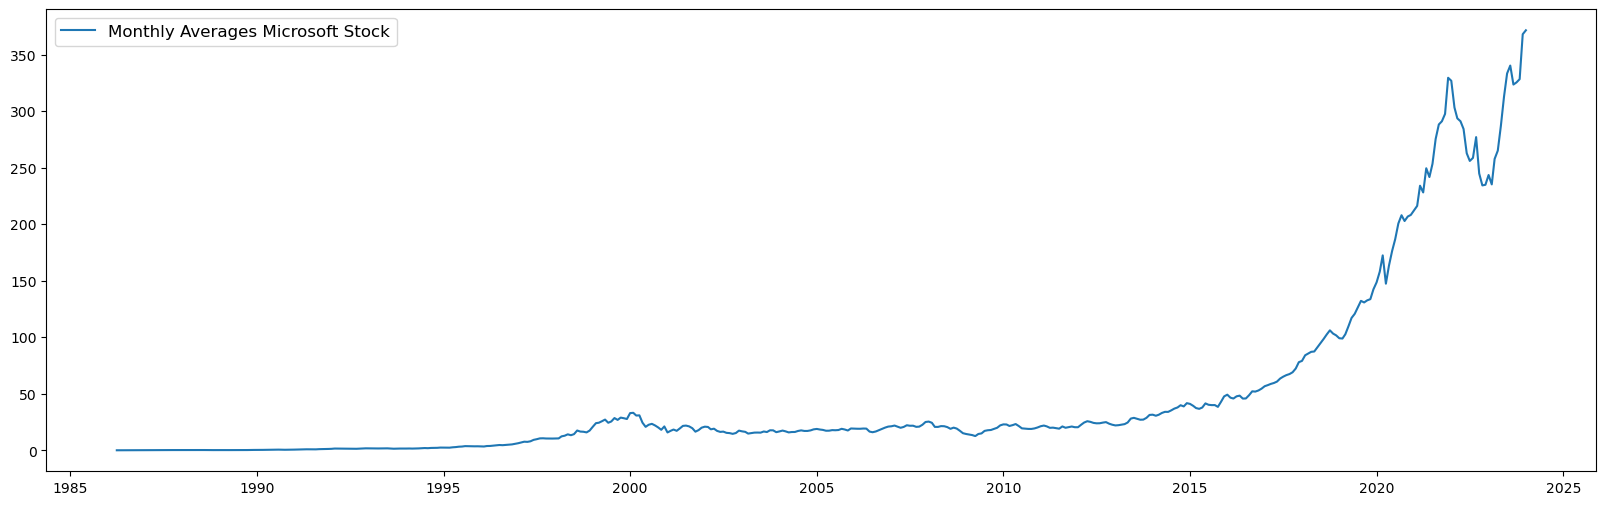

In [33]:
# Resample the data to the monthly level
microsoft_monthly_mean = microsoft_df['Adj Close'].resample('M').mean()
microsoft_monthly_data = microsoft_monthly_mean.to_frame()
##Monthly Stock Price 
fig = plt.figure(figsize=(20,6))
plt.plot(microsoft_monthly_data['Adj Close'],label='Monthly Averages Microsoft Stock')
plt.legend(prop={'size': 12})
plt.show()

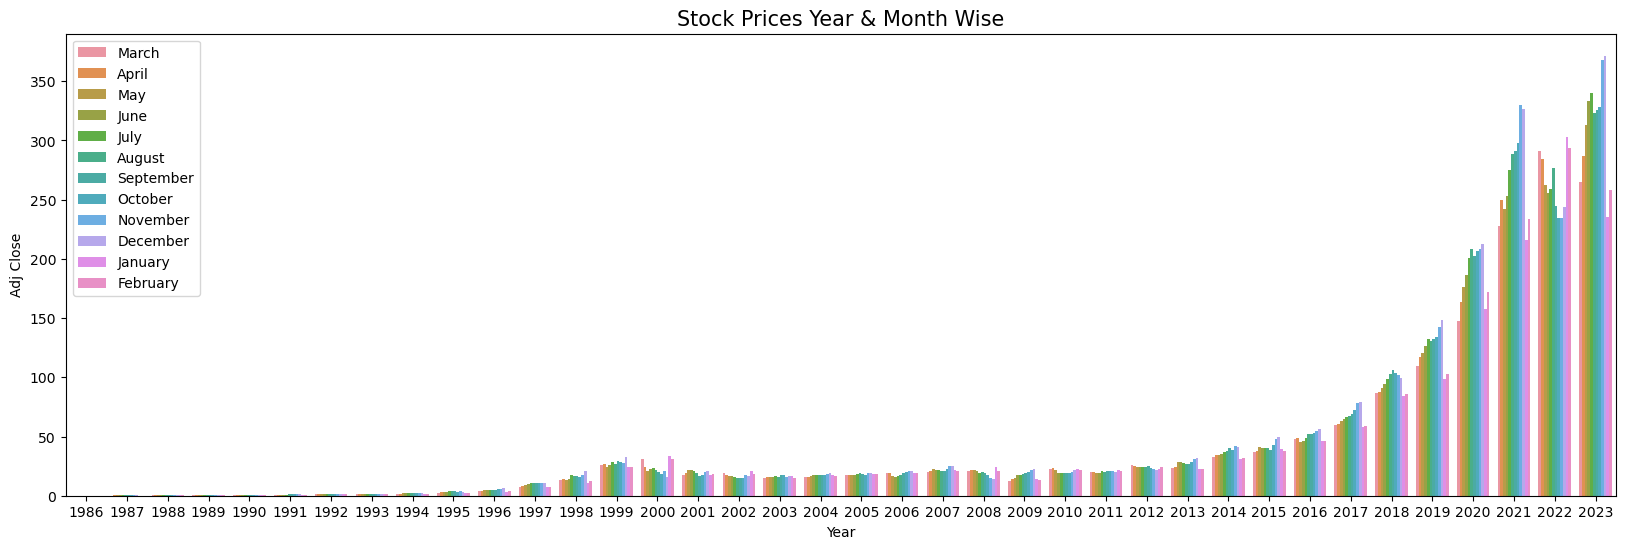

In [34]:
microsoft_monthly_data['Year'] = microsoft_monthly_data.index.year
microsoft_monthly_data['Month'] = microsoft_monthly_data.index.strftime('%B')
microsoft_monthly_data['Quarter'] = microsoft_monthly_data.index.quarter
fig, ax = plt.subplots(figsize=(20,6))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=microsoft_monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

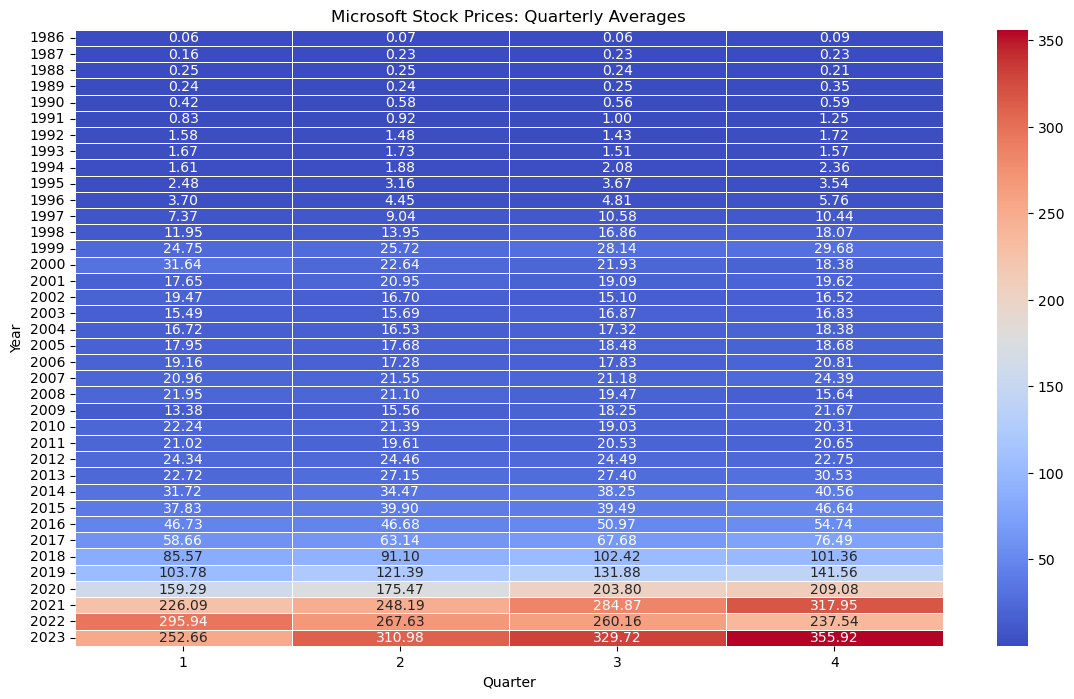

In [35]:
quarter = microsoft_monthly_data.groupby(["Year", "Quarter"])["Adj Close"].mean().unstack()
plt.figure(figsize=(14, 8))
sns.heatmap(quarter, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Microsoft Stock Prices: Quarterly Averages")
plt.show()

<Figure size 3000x1200 with 0 Axes>

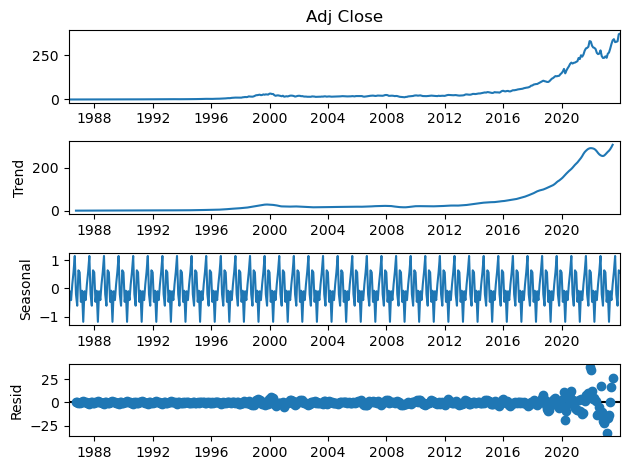

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

plt.figure(figsize=(30,12))
decomposed_series = sd(microsoft_monthly_data['Adj Close'])
decomposed_series.plot()
plt.show()

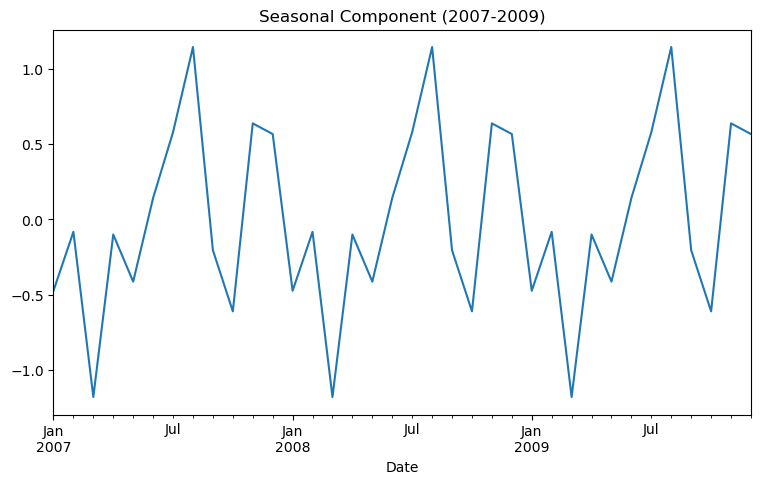

In [37]:
# Assuming decomposed_series is your time series decomposition result
fig = plt.figure(figsize=(9, 5))
decomposed_series.seasonal['2007':'2009'].plot()
plt.title("Seasonal Component (2007-2009)")
plt.show()


In [38]:
from statsmodels.tsa.stattools import adfuller

def func_for_the_fuller(X):
  result_ad_fuller = adfuller(X)
  print('Microsoft ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Microsoft Critical Values:')
  for key, value in result_ad_fuller[4].items():
   print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis for the stock- Time Series is Stationary')
  else:
    print('Failed to Reject Null Hypothesis for the stock- Time Series is Non-Stationary')

func_for_the_fuller(microsoft_monthly_data['Adj Close'])

Microsoft ADF Statistic: 3.453706
p-value: 1.000000
Microsoft Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Failed to Reject Null Hypothesis for the stock- Time Series is Non-Stationary


Text(0.5, 0, 'Lags')

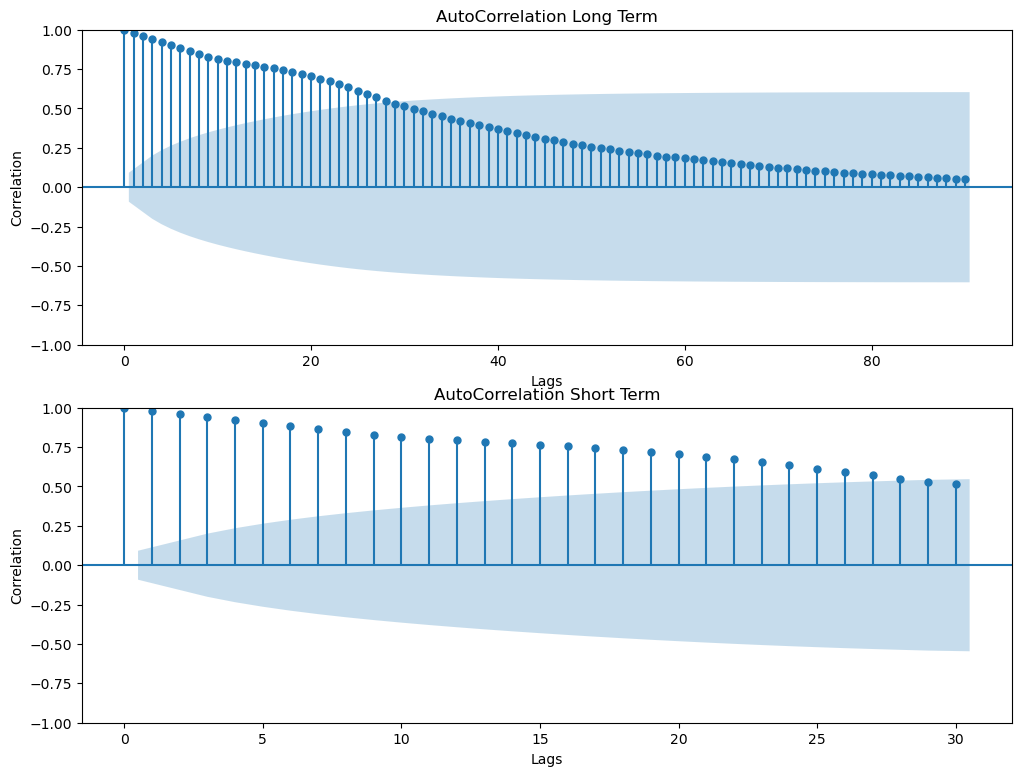

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
acf = plot_acf(microsoft_monthly_data['Adj Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(microsoft_monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


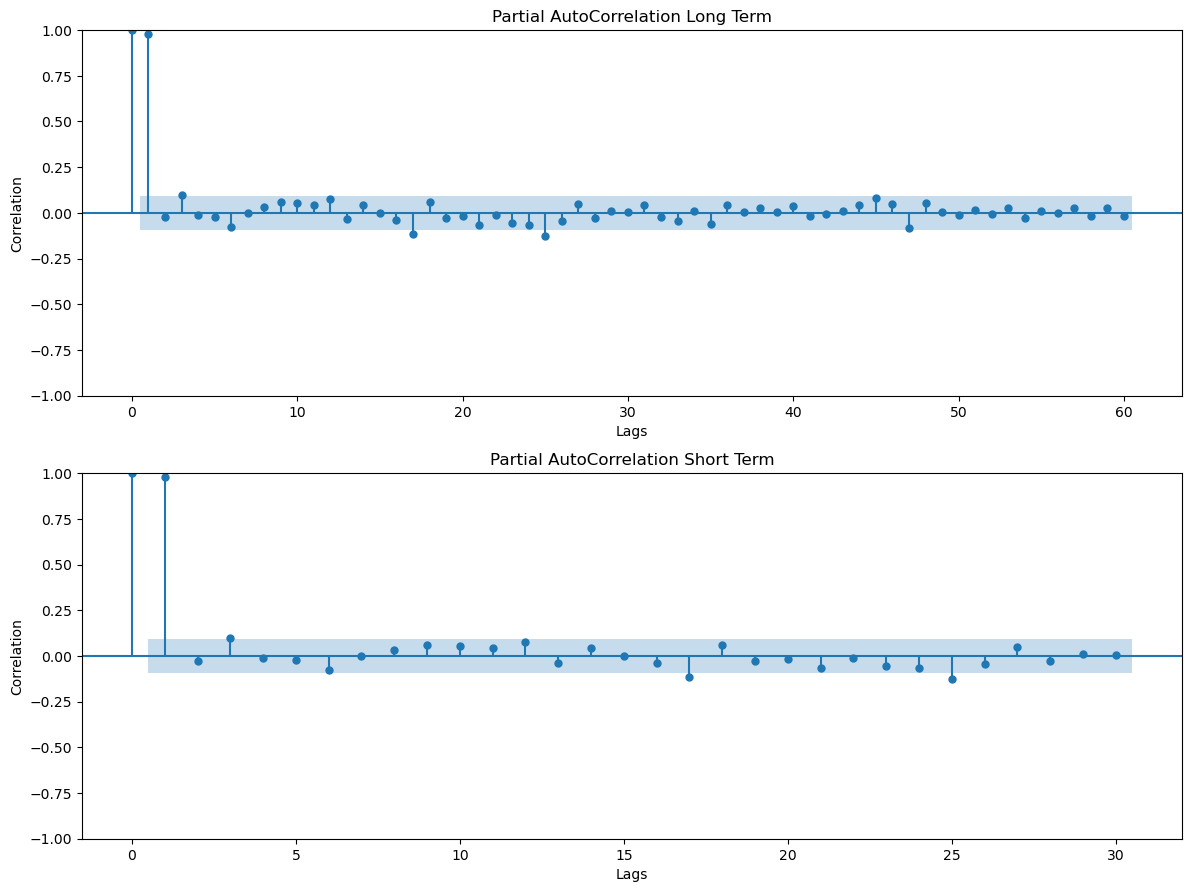

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(12,9))
pacf = plot_pacf(microsoft_monthly_data['Adj Close'],lags=60,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(microsoft_monthly_data['Adj Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

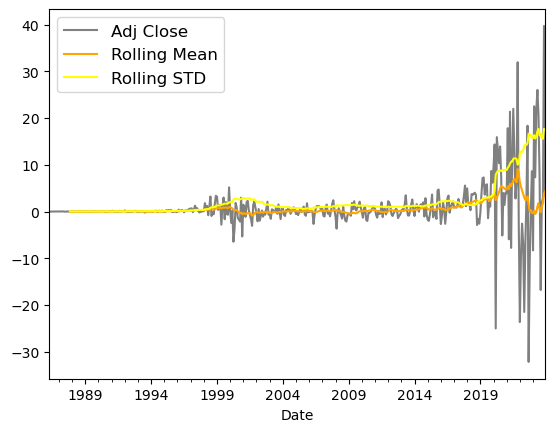

In [41]:
##Differencing By 1
monthly_diff = microsoft_monthly_data['Adj Close'] - microsoft_monthly_data['Adj Close'].shift(1)
monthly_diff[1:].plot(c='grey')
monthly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
monthly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

In [42]:
func_for_the_fuller(monthly_diff[1:])

Microsoft ADF Statistic: -2.482738
p-value: 0.119731
Microsoft Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
Failed to Reject Null Hypothesis for the stock- Time Series is Non-Stationary


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


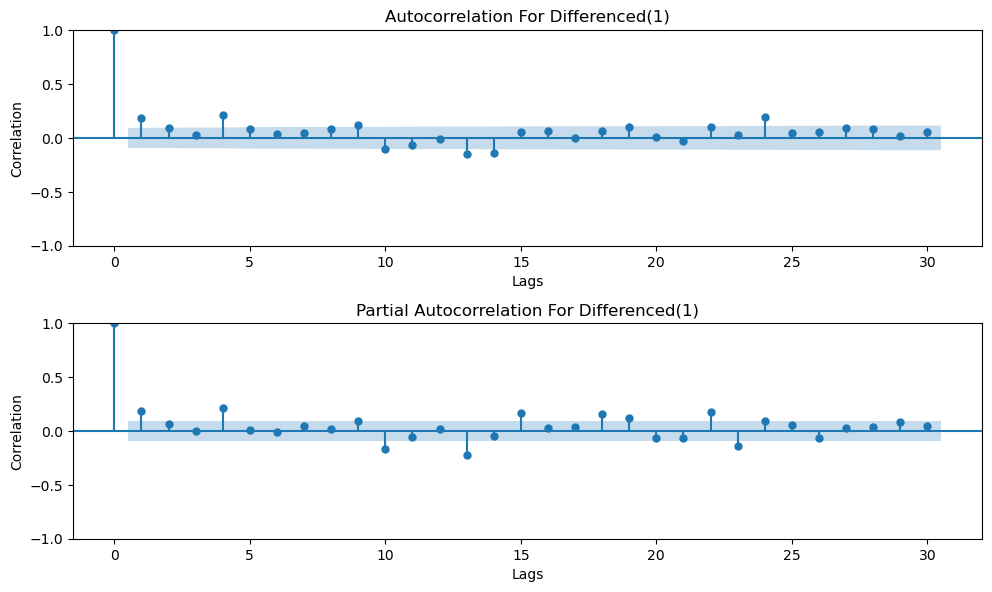

In [43]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,6))
acf = plot_acf(monthly_diff[1:],lags=30,ax=ax1)
pacf = plot_pacf(monthly_diff[1:],lags=30,ax=ax2)
ax1.set_title('Autocorrelation For Differenced(1)')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_title('Partial Autocorrelation For Differenced(1)')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

In [44]:
modelling_series = microsoft_monthly_data['Adj Close']
from sklearn.model_selection import train_test_split as split
train,test = split(modelling_series,train_size=0.7,shuffle=False)

In [45]:
import itertools
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

list_param = []
list_param_seasonal=[]
list_results_aic=[]

from statsmodels.tsa.statespace.sarimax import SARIMAX
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            list_param.append(param)
            list_param_seasonal.append(param_seasonal)
            list_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2613.7890292879156
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2258.808211806927
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2008.1230596473151
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1750.7497713215323
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1694.2966557240234
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1636.7932995298493
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1911.6038030133031
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1655.3750638100164
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1592.61947886062
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1757.415465061698
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1753.1993053173592
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1696.534263661988
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1698.9036352804108
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1695.747065542385
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1637.0444201022033
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1742.6528238061921
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1656.303644312652
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1593.5237360955443

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1432.0972479526877
ARIMA(0, 0, 1)x(1, 0, 2, 12)12 - AIC:1381.1440798228873
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1384.5848865330122
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1376.9908144340072
ARIMA(0, 0, 1)x(1, 1, 2, 12)12 - AIC:1331.8664796842677
ARIMA(0, 0, 1)x(1, 2, 0, 12)12 - AIC:1447.3768539981836
ARIMA(0, 0, 1)x(1, 2, 1, 12)12 - AIC:1357.6096342258886
ARIMA(0, 0, 1)x(1, 2, 2, 12)12 - AIC:1302.9201843798664
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:1386.4346215354894
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:1387.4210091501052
ARIMA(0, 0, 1)x(2, 0, 2, 12)12 - AIC:1381.2298933663342
ARIMA(0, 0, 1)x(2, 1, 0, 12)12 - AIC:1340.474504829609
ARIMA(0, 0, 1)x(2, 1, 1, 12)12 - AIC:1341.967606603237
ARIMA(0, 0, 1)x(2, 1, 2, 12)12 - AIC:1335.4696098767467
ARIMA(0, 0, 1)x(2, 2, 0, 12)12 - AIC:1382.4301797700596
ARIMA(0, 0, 1)x(2, 2, 1, 12)12 - AIC:1314.6130062094635
ARIMA(0, 0, 1)x(2, 2, 2, 12)12 - AIC:1304.9201772411275
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:1873.56690491

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(1, 0, 2, 12)12 - AIC:1269.4490280316113
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:1271.985724354166
ARIMA(0, 0, 2)x(1, 1, 1, 12)12 - AIC:1261.8924018344442
ARIMA(0, 0, 2)x(1, 1, 2, 12)12 - AIC:1223.1410716308997
ARIMA(0, 0, 2)x(1, 2, 0, 12)12 - AIC:1363.6095751254038
ARIMA(0, 0, 2)x(1, 2, 1, 12)12 - AIC:1246.5878104768185
ARIMA(0, 0, 2)x(1, 2, 2, 12)12 - AIC:1200.2837487577913
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:1273.9796666391437


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 1, 12)12 - AIC:1276.9868134594112


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 2)x(2, 0, 2, 12)12 - AIC:1267.5591288156372
ARIMA(0, 0, 2)x(2, 1, 0, 12)12 - AIC:1233.77109840694
ARIMA(0, 0, 2)x(2, 1, 1, 12)12 - AIC:1233.635200451683
ARIMA(0, 0, 2)x(2, 1, 2, 12)12 - AIC:1223.7918413218808
ARIMA(0, 0, 2)x(2, 2, 0, 12)12 - AIC:1290.7662272303744
ARIMA(0, 0, 2)x(2, 2, 1, 12)12 - AIC:1228.3598732035516
ARIMA(0, 0, 2)x(2, 2, 2, 12)12 - AIC:1202.2836597426171
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:967.3825464168812
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:943.6726526991016
ARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:919.5115518774668
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1162.245233201416
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:934.1065113515788
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:907.315999991568
ARIMA(0, 1, 0)x(0, 2, 0, 12)12 - AIC:1452.4260668423096
ARIMA(0, 1, 0)x(0, 2, 1, 12)12 - AIC:1125.2377701463547
ARIMA(0, 1, 0)x(0, 2, 2, 12)12 - AIC:938.3424739820346
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:945.6742256169505
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:945.5223000594551
ARIMA

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 2, 2, 12)12 - AIC:947.1894389894139
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:921.5301925215505
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:923.5300741314626
ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:923.3886736214163
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:968.508744854355
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:910.771351781266
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:911.792003402908
ARIMA(0, 1, 0)x(2, 2, 0, 12)12 - AIC:1102.4222824623137
ARIMA(0, 1, 0)x(2, 2, 1, 12)12 - AIC:978.3192735214523
ARIMA(0, 1, 0)x(2, 2, 2, 12)12 - AIC:964.5239721400843
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:962.7754579452462
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:938.98816950598
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:915.0964693760877
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1158.9057013706085
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:929.8112521897194
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:902.7586157496653
ARIMA(0, 1, 1)x(0, 2, 0, 12)12 - AIC:1448.3622869781848
ARIMA(0, 1, 1)x(0, 2, 1, 12)12 - AIC:1121.6160082235606
ARIMA(0, 1,

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:949.3497727155441


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 2, 12)12 - AIC:923.5892334783896
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1156.0036396072587
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:937.649742178167
ARIMA(1, 0, 0)x(0, 1, 2, 12)12 - AIC:910.9208697081799
ARIMA(1, 0, 0)x(0, 2, 0, 12)12 - AIC:1442.6423553313573
ARIMA(1, 0, 0)x(0, 2, 1, 12)12 - AIC:1119.766494052998
ARIMA(1, 0, 0)x(0, 2, 2, 12)12 - AIC:940.3605292715513
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:947.5383892350616
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:949.4902124343282
ARIMA(1, 0, 0)x(1, 0, 2, 12)12 - AIC:925.5223116473462
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1024.9237724441905
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:943.2782301938809
ARIMA(1, 0, 0)x(1, 1, 2, 12)12 - AIC:910.2733399549679
ARIMA(1, 0, 0)x(1, 2, 0, 12)12 - AIC:1211.4496291465732
ARIMA(1, 0, 0)x(1, 2, 1, 12)12 - AIC:1034.068835577325
ARIMA(1, 0, 0)x(1, 2, 2, 12)12 - AIC:949.5437211400571
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:923.4411763053927
ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:925.4411449807978
ARIMA(1

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:945.244990627016


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 2, 12)12 - AIC:919.4370422276819
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1150.039876184811
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:933.0597388890939
ARIMA(1, 0, 1)x(0, 1, 2, 12)12 - AIC:906.1117929081512
ARIMA(1, 0, 1)x(0, 2, 0, 12)12 - AIC:1435.0498197135194
ARIMA(1, 0, 1)x(0, 2, 1, 12)12 - AIC:1113.6190919806677
ARIMA(1, 0, 1)x(0, 2, 2, 12)12 - AIC:935.1603883334808
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:945.024412531732
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:944.8873885615831
ARIMA(1, 0, 1)x(1, 0, 2, 12)12 - AIC:921.1619164992932
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1022.4148176849988
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:937.6382110236118
ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:905.4519530342975
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:1207.1641161165467
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:1028.3862269263573
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:943.3430797564214
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:921.1941690138499
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:923.1927994976328
ARIMA(

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:941.4479921503101


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:914.6578704715618
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1148.110706840775
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:928.559546753738
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:901.4400283226523
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1433.06404011209
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1111.3347434487805
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:931.4340655919468
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:942.1934832284524
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:939.9577733422701
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:916.1908589970095
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:1019.3084441715837
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:932.0504227791039
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:900.4283171448153
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:1204.1383140021549
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:1022.3391737965221
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:938.3603348105042
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:918.2812562721252
ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:920.2745984622655


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 0, 2, 12)12 - AIC:918.0470181891387
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:964.5549348555371
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:906.5235829341398
ARIMA(1, 0, 2)x(2, 1, 2, 12)12 - AIC:904.8886701794256
ARIMA(1, 0, 2)x(2, 2, 0, 12)12 - AIC:1094.6599804500338
ARIMA(1, 0, 2)x(2, 2, 1, 12)12 - AIC:974.0287732023925


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 2)x(2, 2, 2, 12)12 - AIC:940.3526674993109
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:965.6520769792181
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:941.9512969394159
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:918.0508259374205
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1161.9648028202319
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:933.0561542732673
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:905.7885955873878
ARIMA(1, 1, 0)x(0, 2, 0, 12)12 - AIC:1452.4439479632993
ARIMA(1, 1, 0)x(0, 2, 1, 12)12 - AIC:1125.1429301856465
ARIMA(1, 1, 0)x(0, 2, 2, 12)12 - AIC:937.8166992443055
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:941.8407563301425
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:943.7916656246422
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:919.9974175877069
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1025.8492676005583
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:937.7519059061087
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:905.4710675661837
ARIMA(1, 1, 0)x(1, 2, 0, 12)12 - AIC:1216.474055314669
ARIMA(1, 1, 0)x(1, 2, 1, 12)12 - AIC:1034.84930412742
ARIMA(1

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:902.0475262502597


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:897.3426505011842
ARIMA(1, 1, 2)x(2, 2, 0, 12)12 - AIC:1088.7372455190148
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:968.6701160432204


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 2, 2, 12)12 - AIC:936.6745358396233
ARIMA(1, 2, 0)x(0, 0, 0, 12)12 - AIC:1094.530969283155
ARIMA(1, 2, 0)x(0, 0, 1, 12)12 - AIC:1066.2775723949778
ARIMA(1, 2, 0)x(0, 0, 2, 12)12 - AIC:1037.5516367753364
ARIMA(1, 2, 0)x(0, 1, 0, 12)12 - AIC:1278.7624183405478
ARIMA(1, 2, 0)x(0, 1, 1, 12)12 - AIC:1051.6367416619787
ARIMA(1, 2, 0)x(0, 1, 2, 12)12 - AIC:1019.935892209139
ARIMA(1, 2, 0)x(0, 2, 0, 12)12 - AIC:1559.4256077646583
ARIMA(1, 2, 0)x(0, 2, 1, 12)12 - AIC:1232.3028131394176
ARIMA(1, 2, 0)x(0, 2, 2, 12)12 - AIC:1046.3862775614607
ARIMA(1, 2, 0)x(1, 0, 0, 12)12 - AIC:1066.239630267103
ARIMA(1, 2, 0)x(1, 0, 1, 12)12 - AIC:1068.226614781382
ARIMA(1, 2, 0)x(1, 0, 2, 12)12 - AIC:1039.5329969385698
ARIMA(1, 2, 0)x(1, 1, 0, 12)12 - AIC:1145.5190478068535
ARIMA(1, 2, 0)x(1, 1, 1, 12)12 - AIC:1057.5823485140145
ARIMA(1, 2, 0)x(1, 1, 2, 12)12 - AIC:1020.1946859552229
ARIMA(1, 2, 0)x(1, 2, 0, 12)12 - AIC:1328.2289167038912
ARIMA(1, 2, 0)x(1, 2, 1, 12)12 - AIC:1149.41890430439

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 2)x(2, 2, 2, 12)12 - AIC:943.650045679263
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:967.6363790071474


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 1, 12)12 - AIC:948.4246067844081


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(0, 0, 2, 12)12 - AIC:922.6892115866021
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:1150.1777804303103
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:936.6097404369019
ARIMA(2, 0, 0)x(0, 1, 2, 12)12 - AIC:909.1715709035245
ARIMA(2, 0, 0)x(0, 2, 0, 12)12 - AIC:1434.71041693608
ARIMA(2, 0, 0)x(0, 2, 1, 12)12 - AIC:1116.9991904543228
ARIMA(2, 0, 0)x(0, 2, 2, 12)12 - AIC:939.3121216450687
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:943.8009702449781
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:945.752206680643
ARIMA(2, 0, 0)x(1, 0, 2, 12)12 - AIC:924.1031021462119
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:1020.626947755542
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:938.5982502072015
ARIMA(2, 0, 0)x(1, 1, 2, 12)12 - AIC:908.8992521705193
ARIMA(2, 0, 0)x(1, 2, 0, 12)12 - AIC:1204.6111866270433
ARIMA(2, 0, 0)x(1, 2, 1, 12)12 - AIC:1029.0765386074022
ARIMA(2, 0, 0)x(1, 2, 2, 12)12 - AIC:947.5028037151907
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:919.89031502668
ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:921.889681611248


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 0)x(2, 0, 2, 12)12 - AIC:923.880398720093
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:963.8389659134366
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:907.9425875237115
ARIMA(2, 0, 0)x(2, 1, 2, 12)12 - AIC:911.0519978206776
ARIMA(2, 0, 0)x(2, 2, 0, 12)12 - AIC:1094.2513844892296
ARIMA(2, 0, 0)x(2, 2, 1, 12)12 - AIC:972.3445204908642
ARIMA(2, 0, 0)x(2, 2, 2, 12)12 - AIC:961.5227406864187
ARIMA(2, 0, 1)x(0, 0, 0, 12)12 - AIC:961.285006138682


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 1, 12)12 - AIC:940.3752262192708


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 0, 2, 12)12 - AIC:914.4271443223051
ARIMA(2, 0, 1)x(0, 1, 0, 12)12 - AIC:1148.611599432465
ARIMA(2, 0, 1)x(0, 1, 1, 12)12 - AIC:926.555511109369
ARIMA(2, 0, 1)x(0, 1, 2, 12)12 - AIC:900.6113184857719
ARIMA(2, 0, 1)x(0, 2, 0, 12)12 - AIC:1416.496006248303


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(0, 2, 1, 12)12 - AIC:1111.4398336050172
ARIMA(2, 0, 1)x(0, 2, 2, 12)12 - AIC:929.8608147706201
ARIMA(2, 0, 1)x(1, 0, 0, 12)12 - AIC:938.0697224518192
ARIMA(2, 0, 1)x(1, 0, 1, 12)12 - AIC:939.9991708581224
ARIMA(2, 0, 1)x(1, 0, 2, 12)12 - AIC:916.1593082338316
ARIMA(2, 0, 1)x(1, 1, 0, 12)12 - AIC:1009.3793376475015
ARIMA(2, 0, 1)x(1, 1, 1, 12)12 - AIC:931.7549214971189
ARIMA(2, 0, 1)x(1, 1, 2, 12)12 - AIC:899.4658190661373
ARIMA(2, 0, 1)x(1, 2, 0, 12)12 - AIC:1200.184255442468
ARIMA(2, 0, 1)x(1, 2, 1, 12)12 - AIC:1018.099723389953


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(1, 2, 2, 12)12 - AIC:933.8505240268657
ARIMA(2, 0, 1)x(2, 0, 0, 12)12 - AIC:914.0140179256225
ARIMA(2, 0, 1)x(2, 0, 1, 12)12 - AIC:916.0115207670988
ARIMA(2, 0, 1)x(2, 0, 2, 12)12 - AIC:917.9985616159322
ARIMA(2, 0, 1)x(2, 1, 0, 12)12 - AIC:955.7872941585495


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 1, 12)12 - AIC:901.5708439547341


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 1, 2, 12)12 - AIC:901.4661063860159


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 2, 0, 12)12 - AIC:1088.8627007139585
ARIMA(2, 0, 1)x(2, 2, 1, 12)12 - AIC:964.5443620303712


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1)x(2, 2, 2, 12)12 - AIC:937.8436459416785
ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:960.5051697242559


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 1, 12)12 - AIC:949.3775556677942


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(0, 0, 2, 12)12 - AIC:913.814720592168
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:1129.8370862902625
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:926.0186300930477
ARIMA(2, 0, 2)x(0, 1, 2, 12)12 - AIC:900.035834532733
ARIMA(2, 0, 2)x(0, 2, 0, 12)12 - AIC:1402.2731174454832
ARIMA(2, 0, 2)x(0, 2, 1, 12)12 - AIC:1096.5758450741992
ARIMA(2, 0, 2)x(0, 2, 2, 12)12 - AIC:929.3726832676043
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:939.3096289662262


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:939.1703179503613


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:915.2507308269837
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:1010.5952672584808
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:930.5385227767842
ARIMA(2, 0, 2)x(1, 1, 2, 12)12 - AIC:898.8691873139114
ARIMA(2, 0, 2)x(1, 2, 0, 12)12 - AIC:1184.6454659793003
ARIMA(2, 0, 2)x(1, 2, 1, 12)12 - AIC:1016.5269183894229
ARIMA(2, 0, 2)x(1, 2, 2, 12)12 - AIC:936.7030822137485
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:915.1743461030978


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:917.1720979800322


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:917.0766222933332
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:956.9985329909828


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:903.0750800541412
ARIMA(2, 0, 2)x(2, 1, 2, 12)12 - AIC:900.8692095867007
ARIMA(2, 0, 2)x(2, 2, 0, 12)12 - AIC:1083.4106538318456
ARIMA(2, 0, 2)x(2, 2, 1, 12)12 - AIC:966.0851472629033


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2)x(2, 2, 2, 12)12 - AIC:938.7029527415995
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:963.326955560352
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:941.453174269145
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:917.6284802986853
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1160.7662367861885
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:933.6007275252925
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:905.2933535534856
ARIMA(2, 1, 0)x(0, 2, 0, 12)12 - AIC:1450.413941284729
ARIMA(2, 1, 0)x(0, 2, 1, 12)12 - AIC:1126.7974476563627
ARIMA(2, 1, 0)x(0, 2, 2, 12)12 - AIC:938.831536231586
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:939.2151577638225
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:941.1458421744026
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:919.5436221934722
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1023.4354790600174
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:934.2802494465316
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:905.1965298678838
ARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:1213.6820613365162
ARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:1031.7708570985137
ARIMA(2,

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:964.195299923761
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:935.1517396012486
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:937.197005757874
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:912.825286020955
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1011.8580958655396


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:929.5241851614401


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:897.6643935947748
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:1214.9825850260872


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:1032.094069874901


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:980.5802373255832
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:910.9817960205659
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:912.9787376037029
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:914.816669166157
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:956.184648993448


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:900.4345735199065


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:900.1704292222211
ARIMA(2, 1, 1)x(2, 2, 0, 12)12 - AIC:1223.3630370959227


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 1, 12)12 - AIC:973.7128848150301


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 2, 2, 12)12 - AIC:961.2324114327486
ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:950.3444717223642
ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:928.0881162043122
ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:904.4396301876444
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1138.9525254296518
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:914.3763799554132
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:890.5441698920692
ARIMA(2, 1, 2)x(0, 2, 0, 12)12 - AIC:1414.248165265638
ARIMA(2, 1, 2)x(0, 2, 1, 12)12 - AIC:1104.9349041627688
ARIMA(2, 1, 2)x(0, 2, 2, 12)12 - AIC:919.5813697976439
ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:930.1624132196284
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:930.0529067233028
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:906.438562427747
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1005.0488703472415
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:926.4653092881213
ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:890.0080655584745
ARIMA(2, 1, 2)x(1, 2, 0, 12)12 - AIC:1193.239520943018
ARIMA(2, 1, 2)x(1, 2, 1, 12)12 - AIC:1011.0807001678827


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 2, 2, 12)12 - AIC:934.9471977188031
ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:907.6771222402378
ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:909.6770416962088
ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:908.3440133947445
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:955.7270193465179


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:894.7184471773887


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:894.1559636024468
ARIMA(2, 1, 2)x(2, 2, 0, 12)12 - AIC:1075.5905373351557


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 2, 1, 12)12 - AIC:962.4415896684948


C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 2, 2, 12)12 - AIC:937.8474523676266
ARIMA(2, 2, 0)x(0, 0, 0, 12)12 - AIC:1040.3698899640397
ARIMA(2, 2, 0)x(0, 0, 1, 12)12 - AIC:1016.7729772200291
ARIMA(2, 2, 0)x(0, 0, 2, 12)12 - AIC:988.6975534972662
ARIMA(2, 2, 0)x(0, 1, 0, 12)12 - AIC:1218.104209191113
ARIMA(2, 2, 0)x(0, 1, 1, 12)12 - AIC:1003.2875932001036
ARIMA(2, 2, 0)x(0, 1, 2, 12)12 - AIC:973.7337558146237
ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:1500.5401580327484
ARIMA(2, 2, 0)x(0, 2, 1, 12)12 - AIC:1179.5441710716475
ARIMA(2, 2, 0)x(0, 2, 2, 12)12 - AIC:1003.3596176174436
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:1014.4195937938802
ARIMA(2, 2, 0)x(1, 0, 1, 12)12 - AIC:1016.408624781495
ARIMA(2, 2, 0)x(1, 0, 2, 12)12 - AIC:990.6968235564125
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:1083.0826724549536
ARIMA(2, 2, 0)x(1, 1, 1, 12)12 - AIC:1006.4248096398608
ARIMA(2, 2, 0)x(1, 1, 2, 12)12 - AIC:973.8633135634701
ARIMA(2, 2, 0)x(1, 2, 0, 12)12 - AIC:1265.5464373007203
ARIMA(2, 2, 0)x(1, 2, 1, 12)12 - AIC:1088.7522465708835

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:943.0331172464672
ARIMA(2, 2, 1)x(1, 0, 1, 12)12 - AIC:944.9997337963582
ARIMA(2, 2, 1)x(1, 0, 2, 12)12 - AIC:920.2288378468069
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:1027.529273701439
ARIMA(2, 2, 1)x(1, 1, 1, 12)12 - AIC:942.7651606666043
ARIMA(2, 2, 1)x(1, 1, 2, 12)12 - AIC:909.0629122038115
ARIMA(2, 2, 1)x(1, 2, 0, 12)12 - AIC:1262.461741875806
ARIMA(2, 2, 1)x(1, 2, 1, 12)12 - AIC:1039.738118271649
ARIMA(2, 2, 1)x(1, 2, 2, 12)12 - AIC:950.1591711701383
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:918.754777467833
ARIMA(2, 2, 1)x(2, 0, 1, 12)12 - AIC:920.5284708482196
ARIMA(2, 2, 1)x(2, 0, 2, 12)12 - AIC:922.2286854868947
ARIMA(2, 2, 1)x(2, 1, 0, 12)12 - AIC:968.5509874370129
ARIMA(2, 2, 1)x(2, 1, 1, 12)12 - AIC:911.2784889559482
ARIMA(2, 2, 1)x(2, 1, 2, 12)12 - AIC:911.0681938728299
ARIMA(2, 2, 1)x(2, 2, 0, 12)12 - AIC:1101.3230351024938
ARIMA(2, 2, 1)x(2, 2, 1, 12)12 - AIC:980.8349588812152
ARIMA(2, 2, 1)x(2, 2, 2, 12)12 - AIC:951.8918798613247
ARIMA(2, 2

Observations: 184
Training Observations: 94
Testing Observations: 90
Observations: 274
Training Observations: 184
Testing Observations: 90
Observations: 364
Training Observations: 274
Testing Observations: 90
Observations: 454
Training Observations: 364
Testing Observations: 90


<Figure size 640x480 with 0 Axes>

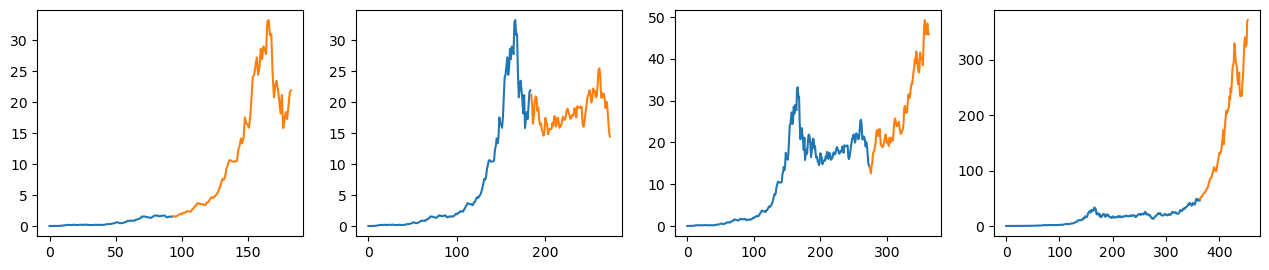

In [46]:
from sklearn.model_selection import TimeSeriesSplit

## Using TimeSeriesSplit from sklearn library
time_series_splits = TimeSeriesSplit(n_splits=4)
X = modelling_series.values
plt.figure(1)
fig = plt.figure(figsize=(24, 10))

index = 1
for train_index, test_index in time_series_splits.split(X):
 train = X[train_index]
 test = X[test_index]
 print('Observations: %d' % (len(train) + len(test)))
 print('Training Observations: %d' % (len(train)))
 print('Testing Observations: %d' % (len(test)))
    
 plt.subplot(360 + index)
 plt.plot(train)
 plt.plot([None for i in train] + [x for x in test])
    # pyplot.title(''.format())
 index += 1
plt.show()

# Splitting the model
Since the dataset cannot be split into train and test so backtesting method is used to split the dataset into train and test.

In [47]:
import statsmodels.api as sm
def backtest_model(train,test):
    model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(2,2,0,12))
    results=model.fit()

    forecasts_train = results.predict(start=0,end=len(train))
    forecasts_test = results.predict(start=len(train),end=len(train)+len(test))


    fig,(ax1,ax2) = plt.subplots(2,figsize=(14,6))

    train = pd.DataFrame(train)
    test = pd.DataFrame(test)

    forecasts_train = pd.DataFrame(forecasts_train)
    forecasts_test = pd.DataFrame(forecasts_test)

    forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
    train.plot(label='Actual',ax=ax1)
    ax1.set_ylabel('Stock Price')
    ax1.set_xlabel('Time')

    forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
    test.plot(label='Actual',ax=ax2)
    ax2.set_ylabel('Stock Price')
    ax2.set_xlabel('Time')

    ax1.legend()
    ax2.legend()
    plt.tight_layout(pad=2)

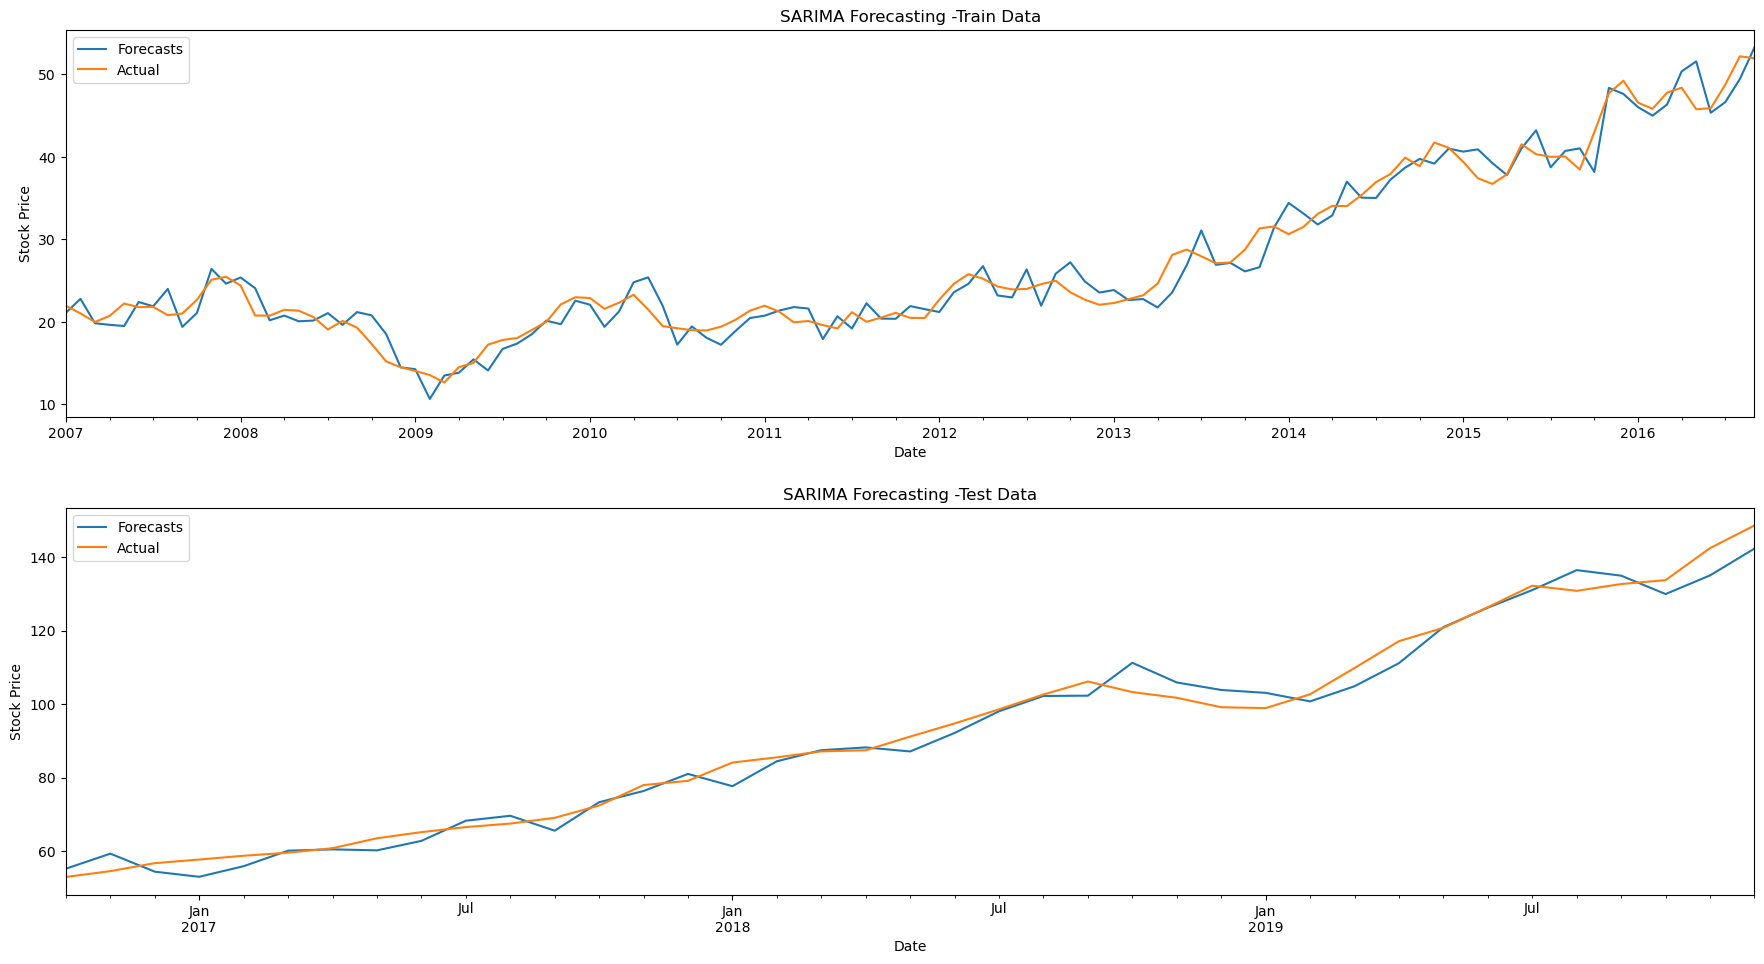

In [48]:
model = sm.tsa.SARIMAX(modelling_series,order=(1,1,1),seasonal_order=(2,2,0,12))
results=model.fit()
forecasts_train = results.predict(start='2007-01-31',end='2016-09-30')
forecasts_test = results.predict(start='2016-10-31',end='2019-12-31')

sd='2007-01-31'
ed='2016-09-30'
sd2='2016-10-31'
ed2='2019-12-31'

fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
modelling_series.loc[sd:ed].plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
modelling_series.loc[sd2:ed2].plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def result_metrics(test_series, forecast_series, model_name):
    print('Result Metrics for {}'.format(model_name))
    
    # Ensure the lengths are consistent
    min_length = min(len(test_series), len(forecast_series))
    test_series = test_series[:min_length]
    forecast_series = forecast_series[:min_length]

    print('R2 Score : ', round(r2_score(test_series, forecast_series), 3))
    print('Mean Squared Error : ', round(mean_squared_error(test_series, forecast_series), 3))
    print('Mean Absolute Error : ', round(mean_absolute_error(test_series, forecast_series), 3))

# Ensure consistent lengths before calculating metrics
result_metrics(modelling_series[sd:ed], forecasts_train, 'SARIMA-Train Data')
print('----')
result_metrics(modelling_series[sd2:ed2], forecasts_test[:len(modelling_series[sd2:ed2])], 'SARIMA-Test Data')


Result Metrics for SARIMA-Train Data
R2 Score :  0.96
Mean Squared Error :  3.835
Mean Absolute Error :  1.571
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.982
Mean Squared Error :  13.323
Mean Absolute Error :  2.972


In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           Adj Close   No. Observations:                  454
Model:             SARIMAX(1, 1, 1)x(2, 2, [], 12)   Log Likelihood               -1424.272
Date:                             Mon, 11 Dec 2023   AIC                           2858.545
Time:                                     16:19:06   BIC                           2878.852
Sample:                                 03-31-1986   HQIC                          2866.564
                                      - 12-31-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4689      0.057      8.233      0.000       0.357       0.581
ma.L1         -0.2891      0.059     -4.923      0.000      -0.404      -0.174
ar.S.L12      -1.3110      0.025    -52.861      0.000      -1.360      -1.262
ar.S.L24      -0.6893      0.030    -22.686      0.000      -0.749      -0.630
sigma2        42.1039      0.996     42.279      0.000      40.152      44.056
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6907.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):             184.24   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `modelling_series` is a pandas Series with a datetime index

# Fit SARIMA model
model = sm.tsa.SARIMAX(modelling_series, order=(1, 1, 1), seasonal_order=(2, 2, 0, 12))
results = model.fit()

# Get the last date in your dataset dynamically
last_date = modelling_series.index[-1]

# Forecast for tomorrow
forecast_tomorrow = results.get_prediction(start=last_date + pd.DateOffset(days=1), end=last_date + pd.DateOffset(days=1))
pred_tomorrow_mean = forecast_tomorrow.predicted_mean

# Create a DataFrame with the predicted values
predicted_df = pd.DataFrame({'Predicted_Price': pred_tomorrow_mean})
predicted_df.index.name = 'Date'

# Print the DataFrame
print(predicted_df)


            Predicted_Price
Date                       
2024-01-31       339.117196


In [52]:
# Fit SARIMA model
model = sm.tsa.SARIMAX(modelling_series, order=(1, 1, 1), seasonal_order=(2, 2, 0, 12))
results = model.fit()

# Get the last date in your dataset dynamically
last_date = modelling_series.index[-1]

# Number of days to predict
future_days = 2

# Lists to store predictions
predicted_values = []

for _ in range(future_days):
    # Forecast for the next day dynamically
    forecast_next_day = results.get_prediction(start=last_date + pd.DateOffset(days=1), end=last_date + pd.DateOffset(days=1), dynamic=True)
    pred_next_day_mean = forecast_next_day.predicted_mean.values[0]

    # Append the prediction to the list
    predicted_values.append(pred_next_day_mean)

    # Update the last date for the next prediction
    last_date = last_date + pd.DateOffset(days=1)

# Get the next day's date
today_date = pd.to_datetime('today')

# Generate future dates starting from the next day
future_dates = pd.date_range(today_date + pd.DateOffset(1), periods=future_days)

# Extract only the year, month, and day
future_dates = future_dates.date

# Create a DataFrame with the predicted values and dates as the index
predicted_df = pd.DataFrame(data={'Predicted_Price': predicted_values}, index=future_dates)

# Print the DataFrame
print(predicted_df)

            Predicted_Price
2023-12-12       339.117196
2023-12-13       339.117196


# LSTM

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error

In [54]:
df_Lstm = data
df_Lstm

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061888,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9509,2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000
9510,2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100
9511,2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900
9512,2023-12-08,369.200012,374.459991,368.230011,374.230011,374.230011,20144800


In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_Lstm['Adj Close'].values.reshape(-1,1))

In [56]:
prediction_days = 60

In [57]:
X_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])
    
X_train, y_train =np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [58]:
X_train.shape, y_train.shape

((9454, 60, 1), (9454,))

In [59]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)    

Epoch 1/25
296/296 [==============================] - 46s 119ms/step - loss: 0.0015
Epoch 2/25
296/296 [==============================] - 33s 113ms/step - loss: 7.2134e-04
Epoch 3/25
296/296 [==============================] - 34s 115ms/step - loss: 5.6051e-04
Epoch 4/25
296/296 [==============================] - 34s 113ms/step - loss: 5.1284e-04
Epoch 5/25
296/296 [==============================] - 34s 114ms/step - loss: 5.6383e-04
Epoch 6/25
296/296 [==============================] - 37s 124ms/step - loss: 5.1295e-04
Epoch 7/25
296/296 [==============================] - 37s 126ms/step - loss: 4.5734e-04
Epoch 8/25
296/296 [==============================] - 39s 133ms/step - loss: 4.8111e-04
Epoch 9/25
296/296 [==============================] - 38s 130ms/step - loss: 4.6741e-04
Epoch 10/25
296/296 [==============================] - 40s 137ms/step - loss: 5.3017e-04
Epoch 11/25
296/296 [==============================] - 41s 140ms/step - loss: 5.1075e-04
Epoch 12/25
296/296 [=============

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [61]:
model.save('lstm_model.h5')

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Specify the test start and end dates
test_start_date = pd.to_datetime('2021-01-01')
test_end_date = pd.to_datetime('2023-12-05')  # Assuming today is '2023-12-06'

# Split the dataset
train_set = df_Lstm[df_Lstm['Date'] < test_start_date]
test_set = df_Lstm[(df_Lstm['Date'] >= test_start_date) & (df_Lstm['Date'] <= test_end_date)]

In [63]:
test_set

,Date,Open,High,Low,Close,Adj Close,Volume
8774,2021-01-04,222.529999,223.000000,214.809998,217.690002,211.996613,37130100
8775,2021-01-05,217.259995,218.520004,215.699997,217.899994,212.201111,23823000
8776,2021-01-06,212.169998,216.490005,211.940002,212.250000,206.698883,35930700
8777,2021-01-07,214.039993,219.339996,213.710007,218.289993,212.580917,27694500
8778,2021-01-08,218.679993,220.580002,217.029999,219.619995,213.876144,22956200
...,...,...,...,...,...,...,...
9505,2023-11-29,383.760010,384.299988,377.440002,378.850006,378.850006,28963400
9506,2023-11-30,378.489990,380.089996,375.470001,378.910004,378.910004,30554400
9507,2023-12-01,376.760010,378.160004,371.309998,374.510010,374.510010,33020400
9508,2023-12-04,369.100006,369.519989,362.899994,369.140015,369.140015,32063300


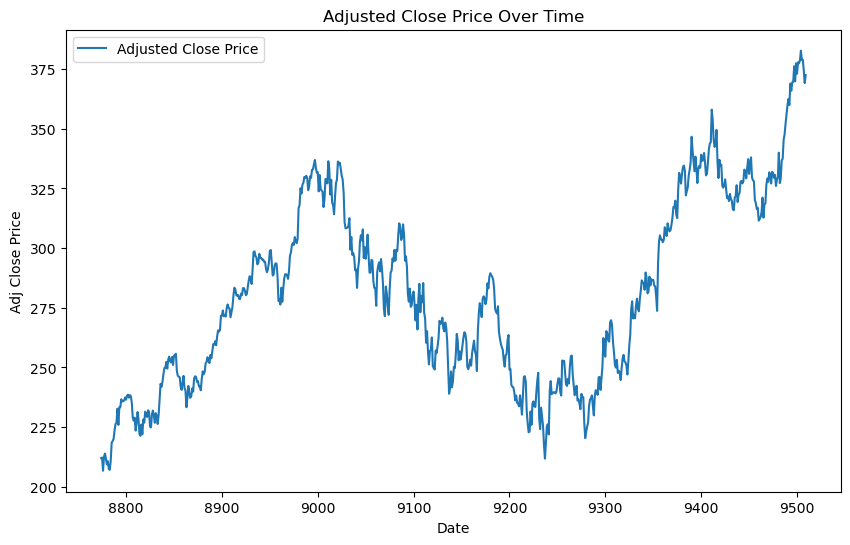

In [64]:
test_set['Adj Close'].plot(label='Adjusted Close Price', figsize=(10, 6))
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(False)
plt.show()

In [65]:
actual_prices = test_set['Adj Close'].values 

In [66]:
total_dataset = pd.cototal_dataset = pd.concat((df_Lstm['Adj Close'],test_set['Adj Close']),axis=0)

In [67]:
model_inputs = total_dataset[len(total_dataset) - len(test_set) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [68]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

y_test = test_set['Adj Close'].values[-X_test.shape[0]:]

In [69]:
X_test.shape, y_test.shape

((736, 60, 1), (736,))

In [70]:
predicted_prices = model.predict(X_test) 

23/23 [==============================] - 3s 44ms/step


In [71]:
predicted_prices = scaler.inverse_transform(predicted_prices)

In [72]:
predicted_prices.shape

(736, 1)

In [73]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_prices)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R2 Score
r2 = r2_score(y_test, predicted_prices)
print(f'R2 Score: {r2}')

# Calculate MSE
mse = mean_squared_error(y_test, predicted_prices)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test, predicted_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 109043.4992389254


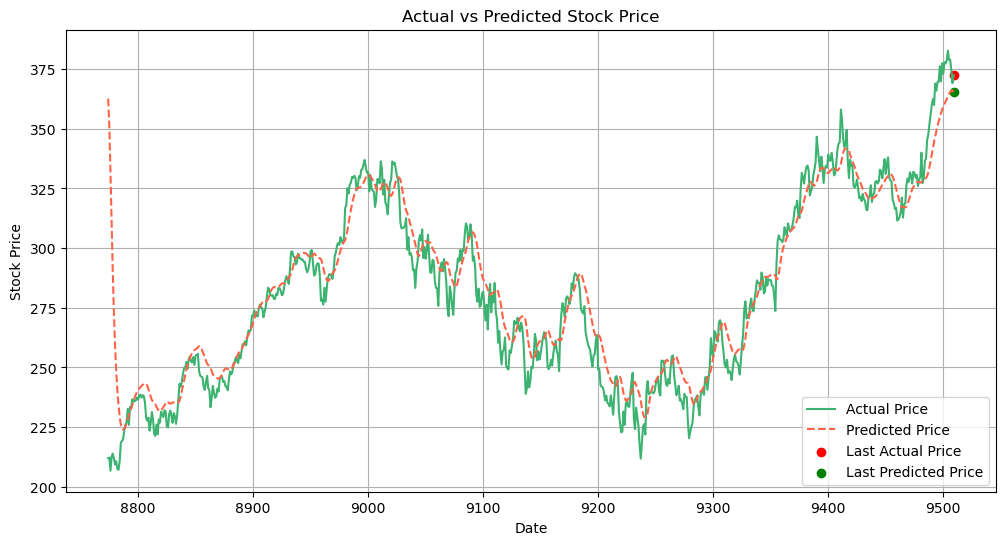

In [74]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.plot(test_set.index, actual_prices, color='mediumseagreen', label="Actual Price", linestyle='-')
plt.plot(test_set.index, predicted_prices, color='tomato', label="Predicted Price", linestyle='--')

# Marking important points
plt.scatter([test_set.index[-1]], [actual_prices[-1]], color='red', marker='o', label='Last Actual Price')
plt.scatter([test_set.index[-1]], [predicted_prices[-1]], color='green', marker='o', label='Last Predicted Price')

# Adding labels and title
plt.title("Actual vs Predicted Stock Price")
plt.xlabel('Date')
plt.ylabel('Stock Price')

# Adding legend
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [75]:
import pandas as pd
import numpy as np

future_days = 2

# Lists to store predictions
predicted_values = []

for _ in range(future_days):
    # Reshape the input data
    real_data = [model_inputs[-prediction_days:]]
    real_data = np.array(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

    # Predict the next day
    prediction = model.predict(real_data)
    
    # Inverse transform the prediction
    prediction = scaler.inverse_transform(prediction)
    
    # Update the input sequence for the next prediction
    model_inputs = np.append(model_inputs, prediction)

    # Append the prediction to the list
    predicted_values.append(prediction[0, 0])

# Get the next day's date
today_date = pd.to_datetime('today')
next_day = today_date + pd.DateOffset(1)

# Generate future dates starting from the next day
future_dates = pd.date_range(next_day, periods=future_days)

# Extract only the year, month, and day
future_dates = future_dates.date

# Create a DataFrame with the predicted values and dates as the index
predicted_df = pd.DataFrame(data={'Predicted_Price': predicted_values}, index=future_dates)

predicted_df


1/1 [==============================] - 0s 66ms/step


,Predicted_Price
2023-12-12,364.68045
2023-12-13,373.24295


# SKFORECAST

In [76]:
pip install skforecast

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [77]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1


In [78]:
# sklearn
# **************************************************************************************************************
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.impute import *

In [79]:
# skforecast
# **************************************************************************************************************
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

In [80]:
df_skforecast = original_data
df_skforecast

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061888,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...
2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000
2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100
2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900


Train dates : 1986-03-13 00:00:00 --- 2021-03-02 00:00:00  (n=8814)
Test dates  : 2021-03-03 00:00:00 --- 2023-12-11 00:00:00  (n=700)



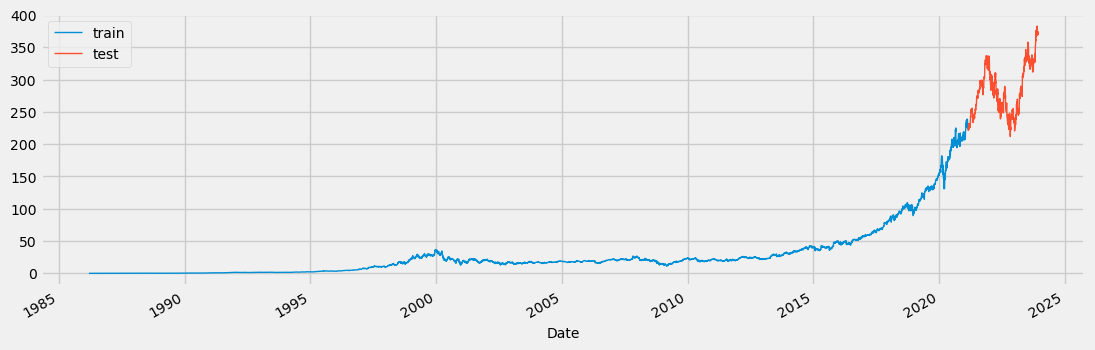

In [81]:
# Set 'Date' column as the index
size = 700

# Split the dataset
train_set = df_skforecast[:-size]
test_set = df_skforecast[-size:]

# Print train and test dates
print(f"Train dates : {train_set.index.min()} --- {train_set.index.max()}  (n={len(train_set)})")
print(f"Test dates  : {test_set.index.min()} --- {test_set.index.max()}  (n={len(test_set)})")
print()

# Plot the training & validation data
col = 'Adj Close'
fig, ax = plt.subplots(figsize=(12, 4))
train_set[col].plot(ax=ax, label='train')
test_set[col].plot(ax=ax, label='test')
ax.legend();


In [82]:
# Create and train forecasterAutoreg
# **************************************************************************************************************
n_days = 120
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(criterion = 'absolute_error', random_state= np.random.randint(100)),
                lags      = n_days)

forecaster.fit(y=train_set[col])
forecaster

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\skforecast\utils\utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\skforecast\utils\utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(criterion='absolute_error', random_state=10) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120] 
Transformer for y: None 
Transformer for exog: None 
Window size: 120 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 8813] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 

In [83]:
# Predictions
# ==============================================================================
steps = 700
predictions = forecaster.predict(steps=steps)
predictions.head(5)

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\skforecast\utils\utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


120    229.287603
121    228.534995
122    228.717245
123    228.569428
124    229.142762
Name: pred, dtype: float64

Text(0, 0.5, 'Stock Price')

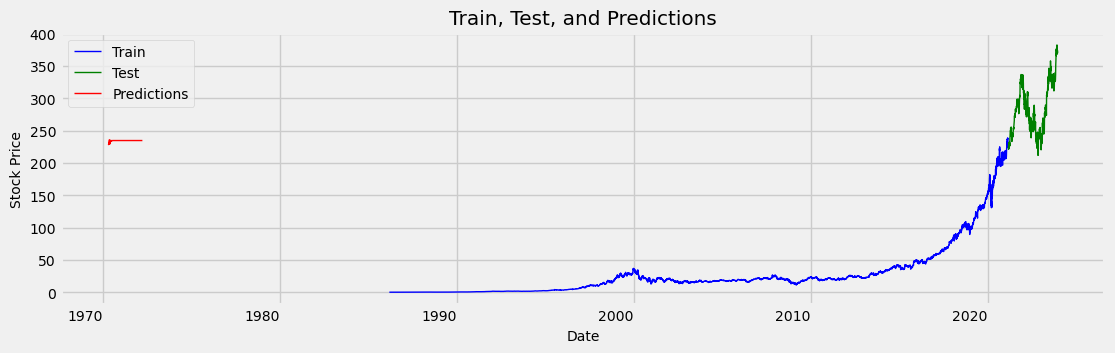

In [84]:
# plot the predicted data
# **************************************************************************************************************
# Plotting
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the training set with a specific color
train_set[col].plot(ax=ax, label='Train', color='blue')

# Plot the test set with a different color
test_set[col].plot(ax=ax, label='Test', color='green')

# Plot the predictions with another color
predictions.plot(ax=ax, label='Predictions', color='red')

ax.legend()
ax.set_title('Train, Test, and Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')

In [85]:
# Define the target column
target_col = 'Adj Close'

# Print train and test dates
print(f"Train dates : {train_set.index.min()} --- {train_set.index.max()}  (n={len(train_set)})")
print(f"Test dates  : {test_set.index.min()} --- {test_set.index.max()}  (n={len(test_set)})")
print("\n")

Train dates : 1986-03-13 00:00:00 --- 2021-03-02 00:00:00  (n=8814)
Test dates  : 2021-03-03 00:00:00 --- 2023-12-11 00:00:00  (n=700)




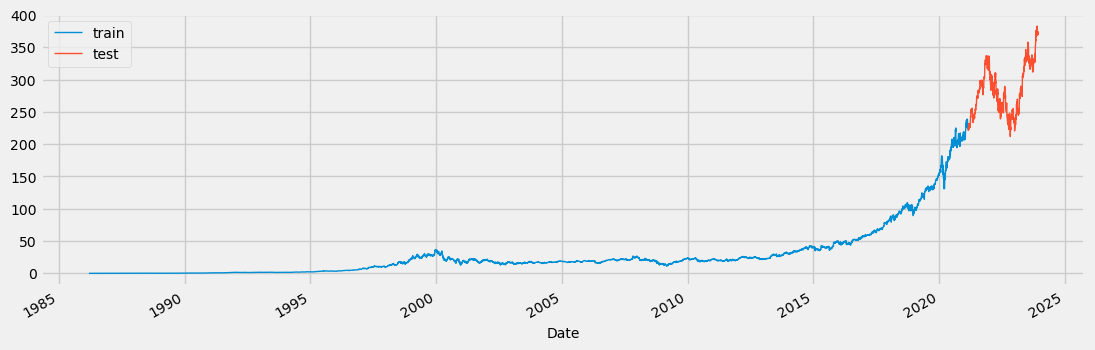

In [86]:
# Plot the training & validation data
fig, ax = plt.subplots(figsize=(12, 4))
train_set[target_col].plot(ax=ax, label='train')
test_set[target_col].plot(ax=ax, label='test')
ax.legend()

In [ ]:
# Create and train ForecasterAutoreg
n_days = 120
forecaster = ForecasterAutoreg(
    regressor=RandomForestRegressor(criterion='absolute_error', random_state=np.random.randint(100)),
    lags=n_days
)

forecaster.fit(y=train_set[target_col])

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\skforecast\utils\utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
# Extend the time index to include future dates
future_dates = pd.date_range(start=train_set.index[-1], periods=steps + 1, freq='B')[1:]

# Predictions
predictions = forecaster.predict(steps=steps)
predictions.index = future_dates
predictions.head(5)

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2.5))
train_set[col].plot(ax=ax, label='train')
test_set[col].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true=test_set[col], y_pred=predictions)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true=test_set[col], y_pred=predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) score
r2 = r2_score(y_true=test_set[col], y_pred=predictions)

print(f"Mean Absolute Error (MAE): {'{:.3f}'.format(mae)}")
print(f"Mean Squared Error (MSE): {'{:.3f}'.format(mse)}")
print(f"Root Mean Squared Error (RMSE): {'{:.3f}'.format(rmse)}")
print(f"R-squared (R2) Score: {'{:.3f}'.format(r2)}")

In [ ]:
# hyperparameter grid search
# **************************************************************************************************************
forecaster_tune = ForecasterAutoreg(
                regressor = RandomForestRegressor(criterion = 'absolute_error', random_state= np.random.randint(100)),
                lags      = n_days # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [150, 180, 200]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster_tune,
                        y                  = train_set[col],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = n_future_days,
                        refit              = False,
                        metric             = 'mean_absolute_error',
                        initial_train_size = int(len(train_set)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
               )

In [ ]:
# create regressor and train the forecaster with the best hyperparameters
# **************************************************************************************************************
regressor_tune = RandomForestRegressor(max_depth=3, n_estimators=100, criterion = 'absolute_error', random_state= np.random.randint(100))
forecaster_opt = ForecasterAutoreg(
                regressor = regressor_tune,
                lags      = 200)

forecaster_opt.fit(y=train_set[col])


# predictions with new & optimized forecaster
# **************************************************************************************************************
preds_opt = forecaster_opt.predict(steps=n_future_days)


# plot the new predicted data
# **************************************************************************************************************
fig, ax = plt.subplots(figsize=(12, 4))
train_set[col].plot(ax=ax, label='train')
test_set[col].plot(ax=ax, label='test')
preds_opt.plot(ax=ax, label='predictions')
ax.legend();